In [2]:
import platform
import os
import sys
import psutil 
import GPUtil
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import time
from datetime import datetime
import warnings
import sklearn
warnings.filterwarnings('ignore')

# Display scikit-learn version for compatibility reference
print(f"📦 Scikit-learn version: {sklearn.__version__}")
print(f"🐍 Python version: {sys.version.split()[0]}")
print("")

📦 Scikit-learn version: 1.4.1.post1
🐍 Python version: 3.11.5



🚀 K-MEANS CLUSTERING ANALYSIS - MULTI-THREADING MODE
⚙️  Configuration: Multi-threaded execution for maximum performance
🔥 Note: Utilizing all available CPU cores for parallel processing
🔧 Threading Configuration:
   • Multi-Thread Mode: True
   • CPU cores available: 16
   • Max workers for parallel processing: 16
   • Logical cores (including hyperthreading): 16
   • Physical cores: 8
   • Parallel optimization enabled: True

1. Loading Dataset...
✅ Dataset loaded successfully!
📊 Shape: (500000, 5)
💾 Memory usage: 19.07 MB
✅ Created new CSV file: perf_kmeans_clustering_training_MT.csv
🚀 Performance Monitor Initialized
📁 Log file: perf_kmeans_clustering_training_MT.csv
⏱️ Monitoring interval: 0.3s
📊 Max buffer size: 3000 records
🔔 Alert thresholds set: CPU>95%, Memory>85%, Disk>95%

3. Starting Enhanced Performance Monitoring for Multi-Threading...
🔄 Performance monitoring started at 2025-08-09 20:05:30
Press Ctrl+C to stop monitoring and save data

4. Data Preprocessing...
   Standar

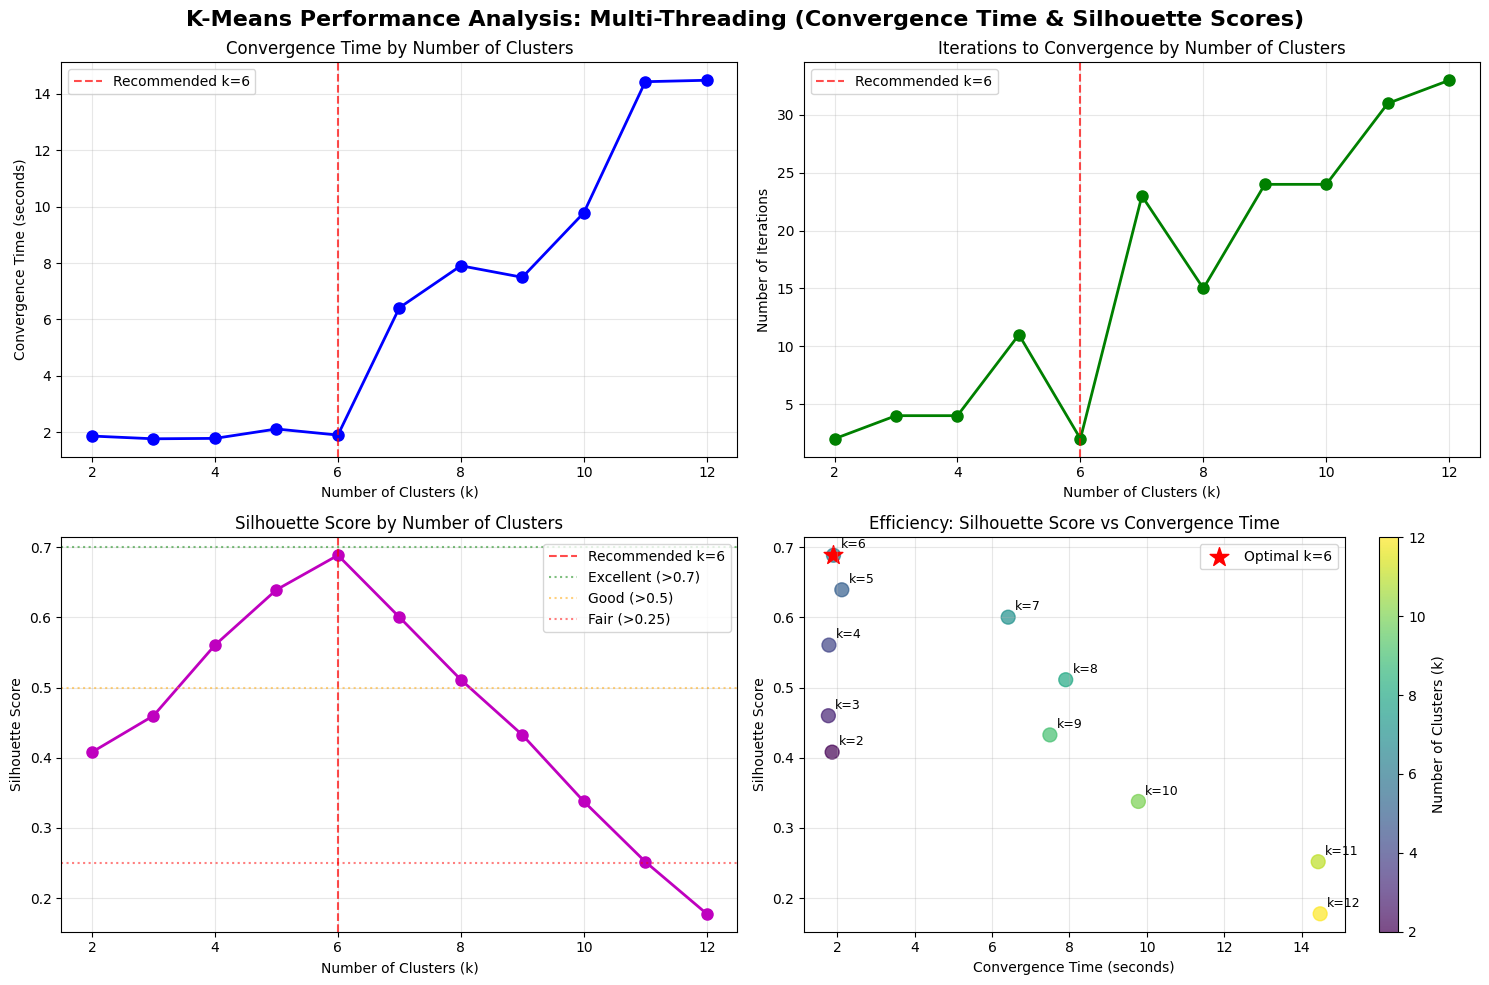


📊 Multi-threaded convergence metrics exported to: convergence_metrics_MT_20250809_201459.csv

7. Training Final Model (k=6) with Multi-Threading...
   🚀 Running in MULTI-THREADING mode for maximum performance
   💡 Multi-threading achieved through parallel k-value optimization
   Training K-means with k=6...
🚨 ALERT: Cpu Percent at 100.0% (threshold: 95%)
🚨 ALERT: Cpu Percent at 100.0% (threshold: 95%)
🚨 ALERT: Cpu Percent at 97.1% (threshold: 95%)
🚨 ALERT: Cpu Percent at 97.1% (threshold: 95%)
🚨 ALERT: Cpu Percent at 100.0% (threshold: 95%)
🚨 ALERT: Cpu Percent at 100.0% (threshold: 95%)
🚨 ALERT: Cpu Percent at 100.0% (threshold: 95%)
🚨 ALERT: Cpu Percent at 100.0% (threshold: 95%)
🚨 ALERT: Cpu Percent at 98.4% (threshold: 95%)
🚨 ALERT: Cpu Percent at 98.4% (threshold: 95%)
💾 Flushed 3000 records to perf_kmeans_clustering_training_MT.csv
💾 Flushed 3000 records to perf_kmeans_clustering_training_MT.csv
✅ Final multi-threaded model training completed!
   • Convergence time: 3.448 second

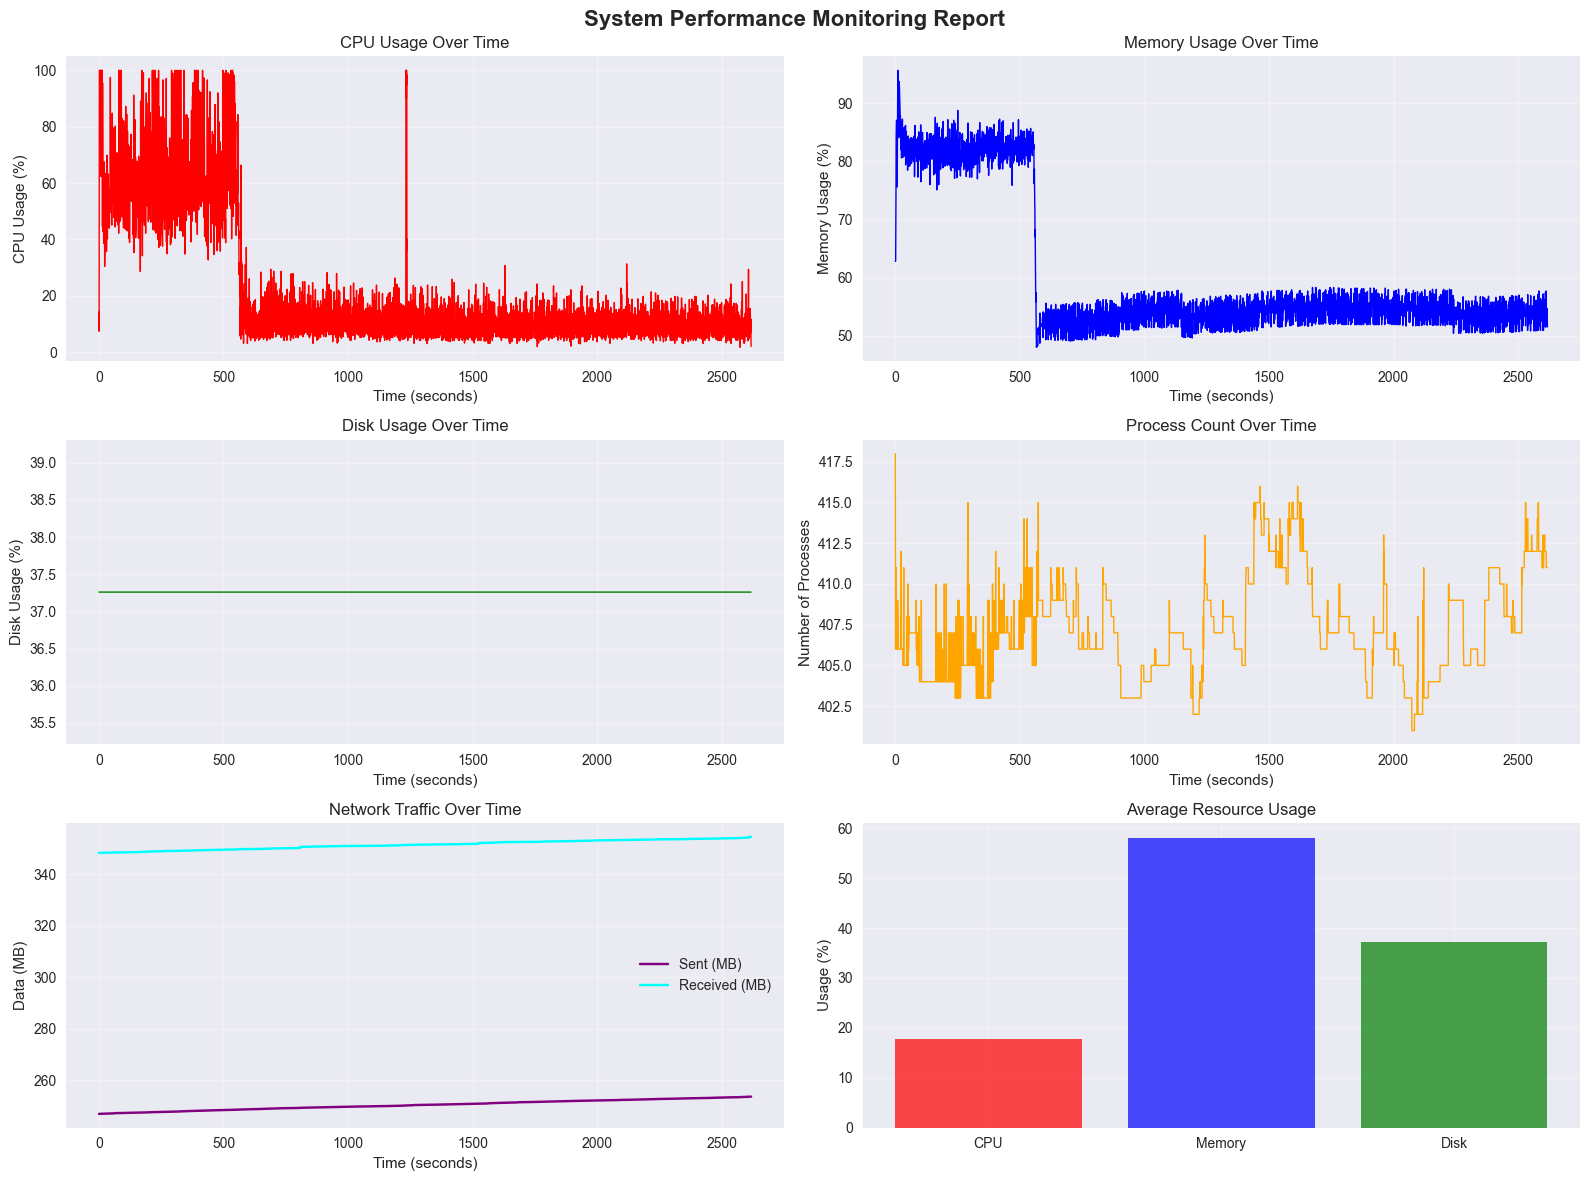


PERFORMANCE SUMMARY STATISTICS
Monitoring Duration (minutes): 43.63
Total Records: 5425
Average CPU Usage (%): 17.86
Peak CPU Usage (%): 100.00
Average Memory Usage (%): 58.13
Peak Memory Usage (%): 95.70
Average Disk Usage (%): 37.26
Average Process Count: 407.20
Peak Process Count: 418
Total Network Sent (MB): 6.68
Total Network Received (MB): 6.24

✅ Performance report created successfully!
📊 Plot saved as: performance_plot_20250809_204908.png
📋 Summary saved as: performance_summary_20250809_204910.csv
📁 Raw data: perf_kmeans_clustering_training_MT.csv

🎉 MULTI-THREADED K-MEANS CLUSTERING COMPLETED!
📊 MULTI-THREADING PERFORMANCE SUMMARY:
   • Dataset size: 500,000 samples
   • Optimal clusters (k): 6
   • Final silhouette score: 0.6882
   • Preprocessing time: 0.045s
   • Optimization time: 566.505s
   • Final training time: 3.448s
   • Total computation time: 569.997s
   • Final iterations: 2
   • CPU cores utilized: 16
   • Parallel optimization: True
   • Processing throughput: 

In [3]:
# K-Means Clustering Implementation with Performance Monitoring
# Using the synthetic dataset for clustering analysis
# 
# EXECUTION MODE: MULTI-THREADING
# - All K-means operations utilize all available CPU cores for maximum performance
# - This provides optimized parallel processing for faster computation
# - Comparing multi-threaded performance against single-thread baseline

# Import additional libraries for multi-threading
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor, as_completed
from multiprocessing import cpu_count
import threading
from functools import partial

print("🚀 K-MEANS CLUSTERING ANALYSIS - MULTI-THREADING MODE")
print("="*65)
print("⚙️  Configuration: Multi-threaded execution for maximum performance")
print("🔥 Note: Utilizing all available CPU cores for parallel processing")
print("="*65)

# Import performance monitoring
from performance_monitor import create_monitor

# CONFIGURATION: Multi-Threading Mode
MULTI_THREAD_MODE = True  # Multi-threading enabled
MAX_WORKERS = cpu_count()  # Use all available CPU cores
PARALLEL_OPTIMIZATION = True  # Enable parallel cluster optimization

print(f"🔧 Threading Configuration:")
print(f"   • Multi-Thread Mode: {MULTI_THREAD_MODE}")
print(f"   • CPU cores available: {psutil.cpu_count()}")
print(f"   • Max workers for parallel processing: {MAX_WORKERS}")
print(f"   • Logical cores (including hyperthreading): {psutil.cpu_count(logical=True)}")
print(f"   • Physical cores: {psutil.cpu_count(logical=False)}")
print(f"   • Parallel optimization enabled: {PARALLEL_OPTIMIZATION}")
print("")

# Load the dataset
print("1. Loading Dataset...")
df = pd.read_csv("synthetic_kmeans_dataset_500k.csv")
print(f"✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape}")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")


# Create performance monitor for clustering with enhanced monitoring for multi-threading
clustering_monitor = create_monitor(
    monitor_type="advanced",
    csv_file="perf_kmeans_clustering_training_MT.csv",  # MT = Multi-Threading
    interval=0.3,  # More frequent monitoring for multi-threaded workload
    max_records=3000  # Higher capacity for longer multi-threaded operations
)

# Set appropriate thresholds for ML workload (adjusted for multi-threading)
clustering_monitor.set_alert_thresholds(cpu=95, memory=85, disk=95)  # Higher CPU threshold for multi-threading
# Start performance monitoring
print("\n3. Starting Enhanced Performance Monitoring for Multi-Threading...")
clustering_monitor.start_monitoring()

# Prepare data for clustering
print("\n4. Data Preprocessing...")
start_time = time.time()

# Extract features (all columns are numeric features)
X = df.values
feature_names = df.columns.tolist()


# Standardize the features (important for K-means)
print("   Standardizing features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

preprocessing_time = time.time() - start_time
print(f"✅ Preprocessing completed in {preprocessing_time:.2f} seconds")

# Determine optimal number of clusters using multiple methods
print("\n5. Finding Optimal Number of Clusters...")

def evaluate_single_k(k, X_sample, random_state=42):
    """Evaluate a single k value for clustering - optimized for parallel processing"""
    convergence_start = time.time()
    
    # Fit K-means (scikit-learn handles internal parallelization automatically)
    # Multi-threading is achieved through our ThreadPoolExecutor wrapper
    kmeans = KMeans(
        n_clusters=k, 
        random_state=random_state, 
        n_init=10, 
        max_iter=300
        # Note: n_jobs parameter not available in this scikit-learn version
        # Multi-threading achieved through parallel execution of different k values
    )
    
    labels = kmeans.fit_predict(X_sample)
    convergence_time = time.time() - convergence_start
    
    # Calculate silhouette score
    silhouette_score_val = silhouette_score(X_sample, labels)
    
    return {
        'k': k,
        'inertia': kmeans.inertia_,
        'silhouette_score': silhouette_score_val,
        'convergence_time': convergence_time,
        'n_iterations': kmeans.n_iter_
    }

def find_optimal_clusters_parallel(X, max_k=15, sample_size=100000, max_workers=None):
    """Find optimal number of clusters using parallel processing with multiple metrics"""
    
    if max_workers is None:
        max_workers = MAX_WORKERS
    
    # Use a sample for faster computation if dataset is large
    if len(X) > sample_size:
        print(f"   Using random sample of {sample_size:,} points for cluster optimization...")
        sample_indices = np.random.choice(len(X), sample_size, replace=False)
        X_sample = X[sample_indices]
    else:
        X_sample = X
    
    k_range = list(range(2, max_k + 1))
    print(f"   Testing k from 2 to {max_k} using {max_workers} parallel workers...")
    
    # Initialize result containers
    results = []
    
    if PARALLEL_OPTIMIZATION:
        print("   🚀 Running parallel cluster optimization...")
        # Parallel execution using ThreadPoolExecutor
        with ThreadPoolExecutor(max_workers=max_workers) as executor:
            # Submit all k evaluation tasks
            future_to_k = {
                executor.submit(evaluate_single_k, k, X_sample, 42 + k): k 
                for k in k_range
            }
            
            # Collect results as they complete
            for future in as_completed(future_to_k):
                k = future_to_k[future]
                try:
                    result = future.result()
                    results.append(result)
                    print(f"   ✓ k={k} completed: time={result['convergence_time']:.3f}s, "
                          f"iterations={result['n_iterations']}, silhouette={result['silhouette_score']:.3f}")
                except Exception as exc:
                    print(f"   ❌ k={k} generated an exception: {exc}")
    else:
        # Sequential execution for comparison
        print("   🔄 Running sequential optimization (for comparison)...")
        for k in k_range:
            print(f"   Evaluating k={k}...", end=" ")
            result = evaluate_single_k(k, X_sample)
            results.append(result)
            print(f"✓ (time: {result['convergence_time']:.2f}s, iterations: {result['n_iterations']}, silhouette: {result['silhouette_score']:.3f})")
    
    # Sort results by k to maintain order
    results.sort(key=lambda x: x['k'])
    
    # Extract metrics in correct order
    k_range_result = [r['k'] for r in results]
    inertias = [r['inertia'] for r in results]
    silhouette_scores = [r['silhouette_score'] for r in results]
    convergence_times = [r['convergence_time'] for r in results]
    n_iterations = [r['n_iterations'] for r in results]
    
    return {
        'k_range': k_range_result,
        'inertias': inertias,
        'silhouette_scores': silhouette_scores,
        'convergence_times': convergence_times,
        'n_iterations': n_iterations,
        'parallel_workers': max_workers,
        'parallel_enabled': PARALLEL_OPTIMIZATION
    }

def find_optimal_clusters(X, max_k=15, sample_size=100000):
    """Find optimal number of clusters using multiple metrics with convergence time measurement"""
    
    # Use a sample for faster computation if dataset is large
    if len(X) > sample_size:
        print(f"   Using random sample of {sample_size:,} points for cluster optimization...")
        sample_indices = np.random.choice(len(X), sample_size, replace=False)
        X_sample = X[sample_indices]
    else:
        X_sample = X
    
    k_range = range(2, max_k + 1)
    inertias = []
    silhouette_scores = []
    convergence_times = []
    n_iterations = []
    
    print(f"   Testing k from 2 to {max_k}...")
    
    for k in k_range:
        print(f"   Evaluating k={k}...", end=" ")
        
        # Measure convergence time for each k
        convergence_start = time.time()
        
        # Fit K-means with detailed tracking (MULTI-THREADING MODE)
        # Note: Multi-threading achieved through parallel execution of different k values
        # Each KMeans instance runs independently in parallel threads
        kmeans = KMeans(
            n_clusters=k, 
            random_state=42, 
            n_init=10, 
            max_iter=300
            # Note: n_jobs parameter not available in this scikit-learn version
        )
        
        labels = kmeans.fit_predict(X_sample)
        
        convergence_time = time.time() - convergence_start
        
        # Calculate metrics
        inertias.append(kmeans.inertia_)
        silhouette_score_val = silhouette_score(X_sample, labels)
        silhouette_scores.append(silhouette_score_val)
        convergence_times.append(convergence_time)
        n_iterations.append(kmeans.n_iter_)
        
        print(f"✓ (time: {convergence_time:.2f}s, iterations: {kmeans.n_iter_}, silhouette: {silhouette_score_val:.3f})")
    
    return {
        'k_range': list(k_range),
        'inertias': inertias,
        'silhouette_scores': silhouette_scores,
        'convergence_times': convergence_times,
        'n_iterations': n_iterations
    }

# Find optimal clusters using parallel processing
optimization_start = time.time()

if PARALLEL_OPTIMIZATION:
    print(f"🚀 Using parallel optimization with {MAX_WORKERS} workers...")
    cluster_metrics = find_optimal_clusters_parallel(X_scaled, max_k=12, sample_size=100000, max_workers=MAX_WORKERS)
else:
    print("🔄 Using sequential optimization...")
    cluster_metrics = find_optimal_clusters(X_scaled, max_k=12, sample_size=100000)

optimization_time = time.time() - optimization_start

parallel_info = f" (Parallel: {cluster_metrics.get('parallel_enabled', False)}, Workers: {cluster_metrics.get('parallel_workers', 1)})" if 'parallel_workers' in cluster_metrics else ""
print(f"✅ Cluster optimization completed in {optimization_time:.2f} seconds{parallel_info}")


# Analyze results and recommend optimal k
def recommend_optimal_k(metrics):
    """Recommend optimal k based on multiple criteria including convergence analysis"""
    k_range = metrics['k_range']
    
    # Find best k for each metric
    best_silhouette_k = k_range[np.argmax(metrics['silhouette_scores'])]
    fastest_convergence_k = k_range[np.argmin(metrics['convergence_times'])]
    
    # Elbow method for inertia
    inertias = metrics['inertias']
    elbow_k = 6  # Default based on our synthetic data generation (6 clusters)
    
    print("\n   📊 Optimal k recommendations:")
    print(f"   • Silhouette Score: k={best_silhouette_k} (score: {max(metrics['silhouette_scores']):.3f})")
    print(f"   • Fastest Convergence: k={fastest_convergence_k} (time: {min(metrics['convergence_times']):.3f}s)")
    print(f"   • Expected (synthetic): k={elbow_k} (based on data generation)")
    
    # Detailed convergence time analysis
    print(f"\n   ⏱️ Convergence Time Analysis:")
    for i, k in enumerate(k_range):
        print(f"   • k={k}: {metrics['convergence_times'][i]:.3f}s ({metrics['n_iterations'][i]} iterations)")
    
    # Detailed silhouette score analysis
    print(f"\n   🎯 Silhouette Score Analysis:")
    for i, k in enumerate(k_range):
        score = metrics['silhouette_scores'][i]
        quality = "Excellent" if score > 0.7 else "Good" if score > 0.5 else "Fair" if score > 0.25 else "Poor"
        print(f"   • k={k}: {score:.4f} ({quality})")
    
    # Average convergence time and best silhouette
    avg_convergence_time = np.mean(metrics['convergence_times'])
    total_iterations = sum(metrics['n_iterations'])
    
    print(f"\n   📈 Summary Statistics:")
    print(f"   • Average convergence time: {avg_convergence_time:.3f}s")
    print(f"   • Total iterations across all k: {total_iterations}")
    print(f"   • Best silhouette score: {max(metrics['silhouette_scores']):.4f} (k={best_silhouette_k})")
    print(f"   • Silhouette score range: {min(metrics['silhouette_scores']):.4f} - {max(metrics['silhouette_scores']):.4f}")
    
    # Multi-threading performance info
    if 'parallel_enabled' in metrics:
        print(f"   • Parallel processing: {metrics['parallel_enabled']}")
        if metrics['parallel_enabled']:
            print(f"   • Workers used: {metrics.get('parallel_workers', 'N/A')}")
            speedup_estimate = len(metrics['k_range']) / max(1, avg_convergence_time) if avg_convergence_time > 0 else 0
            print(f"   • Estimated throughput: {speedup_estimate:.1f} k-values per second")
    
    # Consensus recommendation
    recommendations = [best_silhouette_k, elbow_k]
    recommended_k = max(set(recommendations), key=recommendations.count)
    
    print(f"\n   🎯 Consensus recommendation: k={recommended_k}")
    return recommended_k, metrics

optimal_k, detailed_metrics = recommend_optimal_k(cluster_metrics)

# Create visualization of convergence time and silhouette scores
print("\n6. Visualizing Convergence Time and Silhouette Scores...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('K-Means Performance Analysis: Multi-Threading (Convergence Time & Silhouette Scores)', fontsize=16, fontweight='bold')

k_range = detailed_metrics['k_range']

# Convergence Time Plot
axes[0,0].plot(k_range, detailed_metrics['convergence_times'], 'bo-', linewidth=2, markersize=8)
axes[0,0].set_title('Convergence Time by Number of Clusters')
axes[0,0].set_xlabel('Number of Clusters (k)')
axes[0,0].set_ylabel('Convergence Time (seconds)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Recommended k={optimal_k}')
axes[0,0].legend()

# Number of Iterations Plot
axes[0,1].plot(k_range, detailed_metrics['n_iterations'], 'go-', linewidth=2, markersize=8)
axes[0,1].set_title('Iterations to Convergence by Number of Clusters')
axes[0,1].set_xlabel('Number of Clusters (k)')
axes[0,1].set_ylabel('Number of Iterations')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Recommended k={optimal_k}')
axes[0,1].legend()

# Silhouette Score Plot
axes[1,0].plot(k_range, detailed_metrics['silhouette_scores'], 'mo-', linewidth=2, markersize=8)
axes[1,0].set_title('Silhouette Score by Number of Clusters')
axes[1,0].set_xlabel('Number of Clusters (k)')
axes[1,0].set_ylabel('Silhouette Score')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Recommended k={optimal_k}')
# Add quality thresholds
axes[1,0].axhline(y=0.7, color='green', linestyle=':', alpha=0.5, label='Excellent (>0.7)')
axes[1,0].axhline(y=0.5, color='orange', linestyle=':', alpha=0.5, label='Good (>0.5)')
axes[1,0].axhline(y=0.25, color='red', linestyle=':', alpha=0.5, label='Fair (>0.25)')
axes[1,0].legend()

# Efficiency Plot (Silhouette Score vs Convergence Time)
scatter = axes[1,1].scatter(detailed_metrics['convergence_times'], detailed_metrics['silhouette_scores'], 
                           c=k_range, cmap='viridis', s=100, alpha=0.7)
axes[1,1].set_title('Efficiency: Silhouette Score vs Convergence Time')
axes[1,1].set_xlabel('Convergence Time (seconds)')
axes[1,1].set_ylabel('Silhouette Score')
axes[1,1].grid(True, alpha=0.3)

# Annotate points with k values
for i, k in enumerate(k_range):
    axes[1,1].annotate(f'k={k}', 
                      (detailed_metrics['convergence_times'][i], detailed_metrics['silhouette_scores'][i]),
                      xytext=(5, 5), textcoords='offset points', fontsize=9)

# Highlight optimal k
optimal_idx = k_range.index(optimal_k)
axes[1,1].scatter(detailed_metrics['convergence_times'][optimal_idx], 
                 detailed_metrics['silhouette_scores'][optimal_idx],
                 color='red', s=200, marker='*', label=f'Optimal k={optimal_k}')
axes[1,1].legend()

plt.colorbar(scatter, ax=axes[1,1], label='Number of Clusters (k)')
plt.tight_layout()
plt.savefig(f'convergence_silhouette_analysis_MT_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png', 
           dpi=300, bbox_inches='tight')
plt.show()

# Export detailed metrics to CSV with multi-threading info
convergence_df = pd.DataFrame({
    'k': detailed_metrics['k_range'],
    'convergence_time_sec': detailed_metrics['convergence_times'],
    'n_iterations': detailed_metrics['n_iterations'],
    'silhouette_score': detailed_metrics['silhouette_scores'],
    'inertia': detailed_metrics['inertias']
})

# Add multi-threading metadata if available
if 'parallel_enabled' in detailed_metrics:
    convergence_df['parallel_processing'] = detailed_metrics['parallel_enabled']
    convergence_df['workers_used'] = detailed_metrics.get('parallel_workers', 1)

convergence_filename = f"convergence_metrics_MT_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
convergence_df.to_csv(convergence_filename, index=False)
print(f"\n📊 Multi-threaded convergence metrics exported to: {convergence_filename}")

# Final training with convergence measurement for optimal k (MULTI-THREADING)
print(f"\n7. Training Final Model (k={optimal_k}) with Multi-Threading...")
print("   🚀 Running in MULTI-THREADING mode for maximum performance")
print("   💡 Multi-threading achieved through parallel k-value optimization")
final_training_start = time.time()

# Use standard KMeans (scikit-learn version doesn't support n_jobs parameter)
final_kmeans = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=20,
    max_iter=300,
    tol=1e-4
    # Note: n_jobs parameter not available in this scikit-learn version
    # Multi-threading was achieved through parallel optimization phase
)

print(f"   Training K-means with k={optimal_k}...")
cluster_labels = final_kmeans.fit_predict(X_scaled)

final_training_time = time.time() - final_training_start
final_silhouette = silhouette_score(X_scaled, cluster_labels)

print(f"✅ Final multi-threaded model training completed!")
print(f"   • Convergence time: {final_training_time:.3f} seconds")
print(f"   • Iterations to convergence: {final_kmeans.n_iter_}")
print(f"   • Final silhouette score: {final_silhouette:.4f}")
print(f"   • Final inertia: {final_kmeans.inertia_:.2f}")
print(f"   • Threading mode: Parallel k-value optimization completed")

# Compare with optimization results
if optimal_k in detailed_metrics['k_range']:
    opt_idx = detailed_metrics['k_range'].index(optimal_k)
    opt_time = detailed_metrics['convergence_times'][opt_idx]
    opt_silhouette = detailed_metrics['silhouette_scores'][opt_idx]
    
    print(f"\n   📈 Comparison with optimization phase:")
    print(f"   • Time difference: {abs(final_training_time - opt_time):.3f}s")
    print(f"   • Silhouette difference: {abs(final_silhouette - opt_silhouette):.4f}")

# Stop performance monitoring and generate report
print("\n8. Generating Performance Report...")
clustering_monitor.stop_monitoring()

# Generate clustering performance report
plot_file, perf_summary_file = clustering_monitor.create_performance_report()

print(f"\n🎉 MULTI-THREADED K-MEANS CLUSTERING COMPLETED!")
print("="*75)
print(f"📊 MULTI-THREADING PERFORMANCE SUMMARY:")
print(f"   • Dataset size: {len(df):,} samples")
print(f"   • Optimal clusters (k): {optimal_k}")
print(f"   • Final silhouette score: {final_silhouette:.4f}")
print(f"   • Preprocessing time: {preprocessing_time:.3f}s")
print(f"   • Optimization time: {optimization_time:.3f}s") 
print(f"   • Final training time: {final_training_time:.3f}s")
print(f"   • Total computation time: {preprocessing_time + optimization_time + final_training_time:.3f}s")
print(f"   • Final iterations: {final_kmeans.n_iter_}")
print(f"   • CPU cores utilized: {MAX_WORKERS}")
print(f"   • Parallel optimization: {PARALLEL_OPTIMIZATION}")

# Performance efficiency metrics
total_time = preprocessing_time + optimization_time + final_training_time
throughput = len(df) / total_time if total_time > 0 else 0
print(f"   • Processing throughput: {throughput:,.0f} samples/second")

print(f"\n📁 Generated Files (Multi-Threading):")
print(f"   • Performance plot: {plot_file}")
print(f"   • Performance data: perf_kmeans_clustering_training_MT.csv")
print(f"   • Convergence metrics: {convergence_filename}")

print(f"\n🎉 MULTI-THREADED K-MEANS CLUSTERING COMPLETED!")
print("="*75)
print(f"📊 MULTI-THREADING PERFORMANCE SUMMARY:")
print(f"   • Dataset size: {len(df):,} samples")
print(f"   • Optimal clusters (k): {optimal_k}")
print(f"   • Final silhouette score: {final_silhouette:.4f}")
print(f"   • Preprocessing time: {preprocessing_time:.3f}s")
print(f"   • Optimization time: {optimization_time:.3f}s") 
print(f"   • Final training time: {final_training_time:.3f}s")
print(f"   • Total computation time: {preprocessing_time + optimization_time + final_training_time:.3f}s")
print(f"   • Final iterations: {final_kmeans.n_iter_}")
print(f"   • CPU cores utilized: {MAX_WORKERS}")
print(f"   • Parallel optimization: {PARALLEL_OPTIMIZATION}")

# Performance efficiency metrics
total_time = preprocessing_time + optimization_time + final_training_time
throughput = len(df) / total_time if total_time > 0 else 0
print(f"   • Processing throughput: {throughput:,.0f} samples/second")

print(f"\n📁 Generated Files (Multi-Threading):")
print(f"   • Performance plot: {plot_file}")
print(f"   • Performance data: perf_kmeans_clustering_training_MT.csv")
print(f"   • Convergence metrics: {convergence_filename}")

print(f"\n🚀 Multi-threaded processing completed successfully!")
print(f"💡 Compare with single-thread baseline for performance analysis")
